In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

df_bio = pd.read_csv('BioParams.csv',delimiter='\t')


In [45]:
time = df_bio['time']

In [46]:
df_bio.head()

,time,Reg,myo0_1,myo1_17,myo1_7,myo17_13,myo1_10,myo10_17
0,1000.0,4.770064,1.014761,0,1.042717,3.344943,1.018811,1.018811
1,1000.1,4.760161,1.029071,0,1.084146,5.630541,1.037082,1.037086
2,1000.2,4.766215,1.043075,0,1.124305,7.858377,1.054870,1.054884
3,1000.3,4.758239,1.056662,0,1.163222,10.030023,1.072195,1.072227
4,1000.4,4.754536,1.069879,0,1.200941,12.146973,1.089041,1.089104


In [47]:
df_bio.tail()

,time,Reg,myo0_1,myo1_17,myo1_7,myo17_13,myo1_10,myo10_17
49995,5999.5,347.706771,119.789716,0,116.505370,108.669648,119.146870,119.442941
49996,5999.6,347.773000,119.805179,0,116.519662,108.674606,119.162777,119.459642
49997,5999.7,347.866683,119.821038,0,116.535171,108.682008,119.177692,119.475347
49998,5999.8,347.800928,119.835971,0,116.548755,108.687461,119.194203,119.492651
49999,5999.9,348.018836,119.852332,0,116.564698,108.693580,119.208674,119.507908


<IPython.core.display.Javascript object>


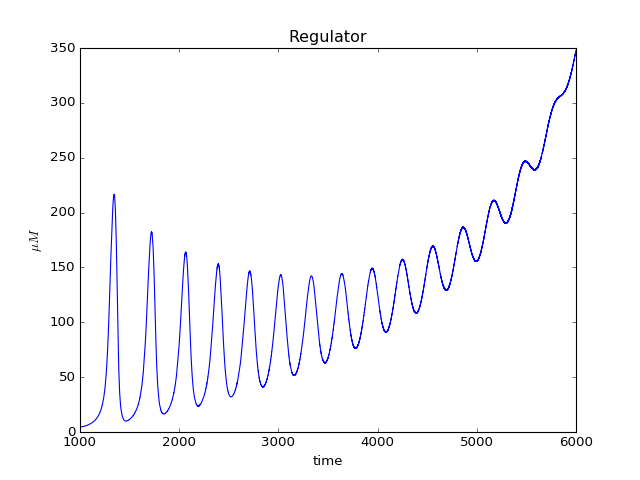

In [48]:
plt.figure(1)
plt.title('Regulator')
plt.plot(time,df_bio['Reg'])
plt.xlim([time.min(),time.max()])
plt.xlabel("time")
plt.ylabel("$\mu M$")
plt.show()

<IPython.core.display.Javascript object>


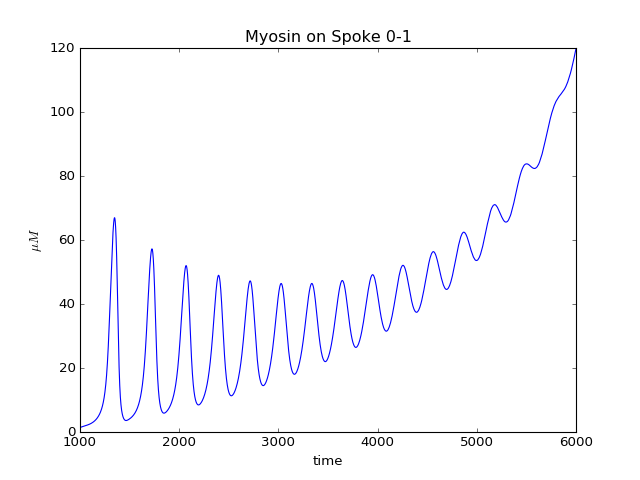

In [50]:
plt.figure(2)
plt.title('Myosin on Spoke 0-1')
plt.plot(time,df_bio['myo0_1'])
plt.xlim([time.min(),time.max()])
plt.xlabel("time")
plt.ylabel("$\mu M$")
plt.show()

<IPython.core.display.Javascript object>


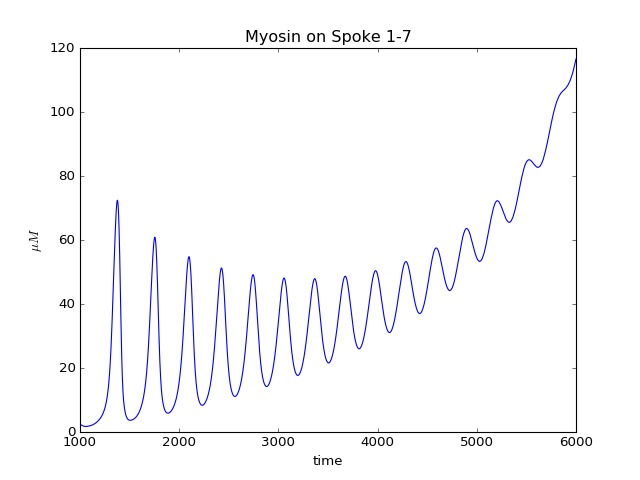

In [49]:
plt.figure(3)
plt.title('Myosin on Spoke 1-7')
plt.plot(time,df_bio['myo1_7'])
plt.xlim([time.min(),time.max()])
plt.xlabel("time")
plt.ylabel("$\mu M$")
plt.show()

<IPython.core.display.Javascript object>


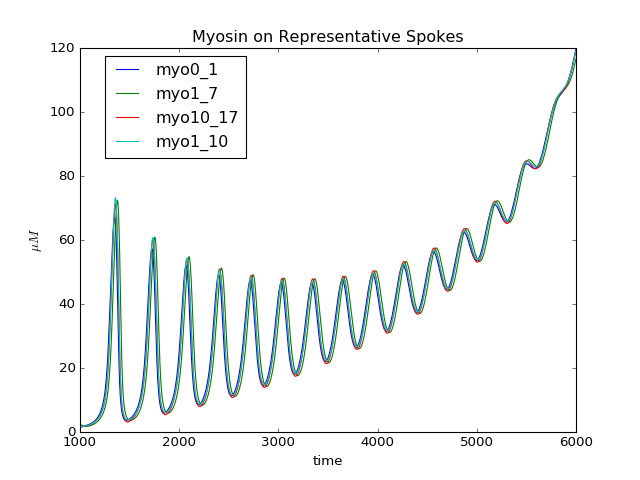

In [51]:
plt.figure(4)
plt.title('Myosin on Representative Spokes')
plt.plot(time,df_bio['myo0_1'])
plt.plot(time,df_bio['myo1_7'])
plt.plot(time,df_bio['myo10_17'])
plt.plot(time,df_bio['myo1_10'])
plt.xlim([time.min(),time.max()])
plt.xlabel("time")
plt.ylabel("$\mu M$")
plt.legend(bbox_to_anchor=(0.35,1))
plt.show()

In [42]:
df_bio.tail()

,time,Reg,myo0_1,myo1_17,myo1_7,myo17_13,myo1_10,myo10_17
16217,2621.7,66.712939,21.645608,0,15.361733,10.644672,19.379218,19.103072
16218,2621.8,66.733926,21.668811,0,15.376647,10.644267,19.399126,19.124160
16219,2621.9,66.809517,21.692033,0,15.391143,10.643940,19.419760,19.145967
16220,2622.0,66.943370,21.715762,0,15.405964,10.643689,19.440654,19.168033
16221,2622.1,67.000000,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>


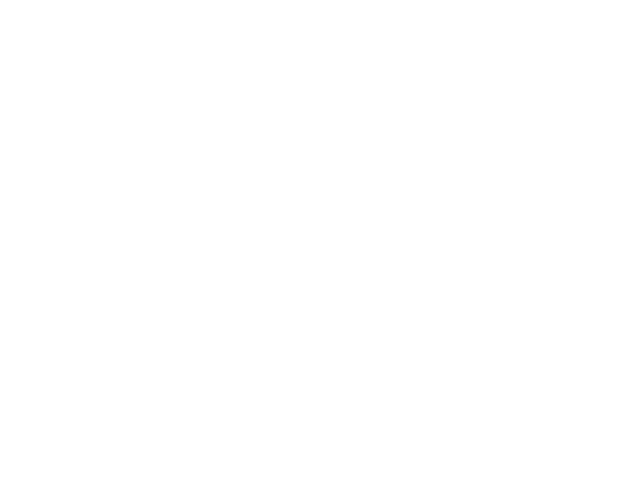

AttributeError: 'DataFrame' object has no attribute 'myo0'

In [8]:
fig, ax1 = plt.subplots()
plt.title('')
ax1.plot(time,df_bio.myo0,'b-')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Myosin', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
    
ax2 = ax1.twinx()
ax2.plot(time, df_bio.force0, 'r-')
ax2.set_ylabel('Force', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.show()

In [ ]:
dt = np.diff(time)

In [ ]:
print("The max dt used was: ", np.amax(dt))
print("The min dt used was: ", np.amin(dt))
print("The mean dt used was:", np.mean(dt))
np.mean(dt)*10

In [ ]:
%matplotlib auto
p0 = (x0[0],y0[0])
p1 = (x1[0],y1[0])
p2 = (x2[0],y2[0])
p3 = (x3[0],y3[0])
p4 = (x4[0],y4[0])
p5 = (x5[0],y5[0])

nodes = [p0,p1,p2,p3,p4,p5]

G = nx.Graph()

i = 0
for node in nodes:
    G.add_node(i,{'pos':node,'cell':1})
#    G.add_edge('medial',i,{'name':1})
    i += 1
G.add_path([0,1,2,3,4,5,0])

fig = plt.figure()

pos = nx.get_node_attributes(G,'pos')

nx.draw(G,pos)
plt.title("Time")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.axis("on")
plt.grid("on")

for i in range(1,len(time),1000):
    G.node[0]['pos'] = (x0[i],y0[i])
    G.node[1]['pos'] = (x1[i],y1[i])
    G.node[2]['pos'] = (x2[i],y2[i])
    G.node[3]['pos'] = (x3[i],y3[i])
    G.node[4]['pos'] = (x4[i],y4[i])
    G.node[5]['pos'] = (x5[i],y5[i])

    pos = nx.get_node_attributes(G,'pos')
    nx.draw(G,pos)
    plt.title('Time')
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.axis("on")
    plt.grid("on")
    plt.pause(0.5)

plt.show()